# end to end machine learning project .
 starting off with importing libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import the kaggle dataset.

In [2]:
df=pd.read_csv("data/StudentsPerformance.csv")

In [3]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


## Dataset information.
1. gender: sex of students-- {male/female}
2. race/ethnicity:ethnicty of students --{ group A,B,C,D,E}
3. parental level of education: parents'final education -- {bachelor's degree, some college , master's degree , associate's degree ,high school}
4. lunch : having lunch before test {standard or free/reduced}
5. test preparation course: complete or not complete before test
6. math score
7. reading score
8. writing score


In [4]:
df.shape

(1000, 8)

checking null values in the dataset.

In [5]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


the count of duplicated values in the datset.

In [6]:
df.duplicated().sum()

np.int64(0)

info about the datset like the no. of rows and columns.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


no. of unique values in the dataset.

In [8]:
df.nunique()

,0
gender,2
race/ethnicity,5
parental level of education,6
lunch,2
test preparation course,2
math score,81
reading score,72
writing score,77


statistics about the datset.

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Exploring data..

In [10]:
print("categories in 'gender' variable:   ",end=" ")
print(df['gender'].unique())
print("categories in 'race/ethnicity' variable:   ",end=" ")
print(df['race/ethnicity'].unique())
print("categories in 'parental level of education' variable:   ",end=" ")
print(df['parental level of education'].unique())
print("categories in 'lunch' variable:   ",end=" ")
print(df['lunch'].unique())
print("categories in 'test preparation course' variable:   ",end=" ")
print(df['test preparation course'].unique())

categories in 'gender' variable:    ['female' 'male']
categories in 'race/ethnicity' variable:    ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental level of education' variable:    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variable:    ['standard' 'free/reduced']
categories in 'test preparation course' variable:    ['none' 'completed']


define numerical and categorical columns..

In [11]:
numeric_features=[feature for feature in df.columns if df[feature].dtype !='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype =='O']

print('we have {} numerical features :{}'.format(len(numeric_features),numeric_features))
print('we have {} categorical features :{}'.format(len(categorical_features),categorical_features))

we have 3 numerical features :['math score', 'reading score', 'writing score']
we have 5 categorical features :['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


adding columns for "total score" and "average score".

In [12]:
df['total score']=df['math score']+df['reading score']+df['writing score']
df['average']=df['total score']/3
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


 numer of students having sccore equal to 100.

In [20]:
reading_full=df[df['reading score']==100]['average'].count()
writing_full=df[df['writing score']==100]['average'].count()
math_full=df[df['math score']==100]['average'].count()

print(f'number of students with full marks in maths:{math_full} ')
print(f'number of students with full marks in writing :{writing_full} ')
print(f'number of students with full marks in reading:{reading_full} ')

number of students with full marks in maths:7 
number of students with full marks in writing :14 
number of students with full marks in reading:17 


number of students having score less than 20.

In [14]:
reading_less_20=df[df['reading score']<=20]['average'].count()
writing_less_20=df[df['writing score']<=20]['average'].count()
math_less_20=df[df['math score']<=20]['average'].count()

print(f'number of students having score less than 20 in reading :{reading_less_20}')
print(f'number of students having score less than  20 in writing :{writing_less_20}')
print(f'number of students having score less than 20 in maths:{math_less_20}')



number of students having score less than 20 in reading :1
number of students having score less than  20 in writing :3
number of students having score less than 20 in maths:4


Histogram and KDE on the basis of average.

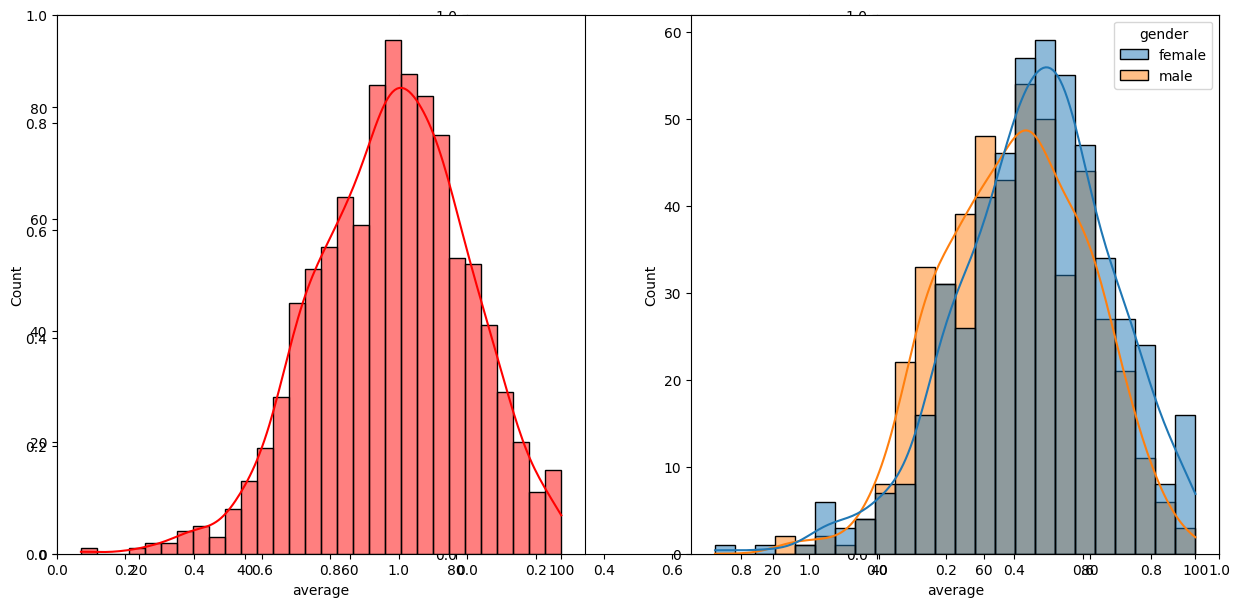

'\nfemales scores more average markd than males\n\n'

In [15]:
fig,axs=plt.subplots(1,3,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='r')
plt.subplot(122)
sns.histplot(data=df,x='average',hue='gender',kde=True)
plt.show()
'''
females scores more average markd than males

'''

Histogram and KDE on the basis of total score.

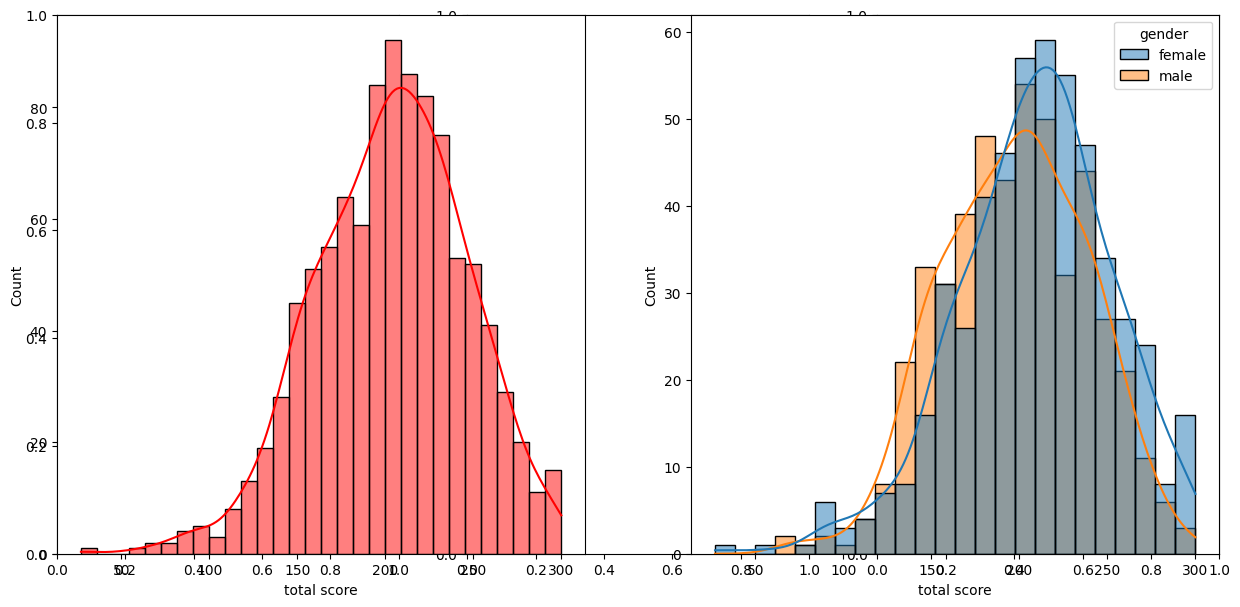

'\nfemales socre more total marks than males\n\n'

In [16]:
fig,axs=plt.subplots(1,3,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='r')
plt.subplot(122)
sns.histplot(data=df,x='total score',hue='gender',kde=True)
plt.show()
'''
females socre more total marks than males

'''

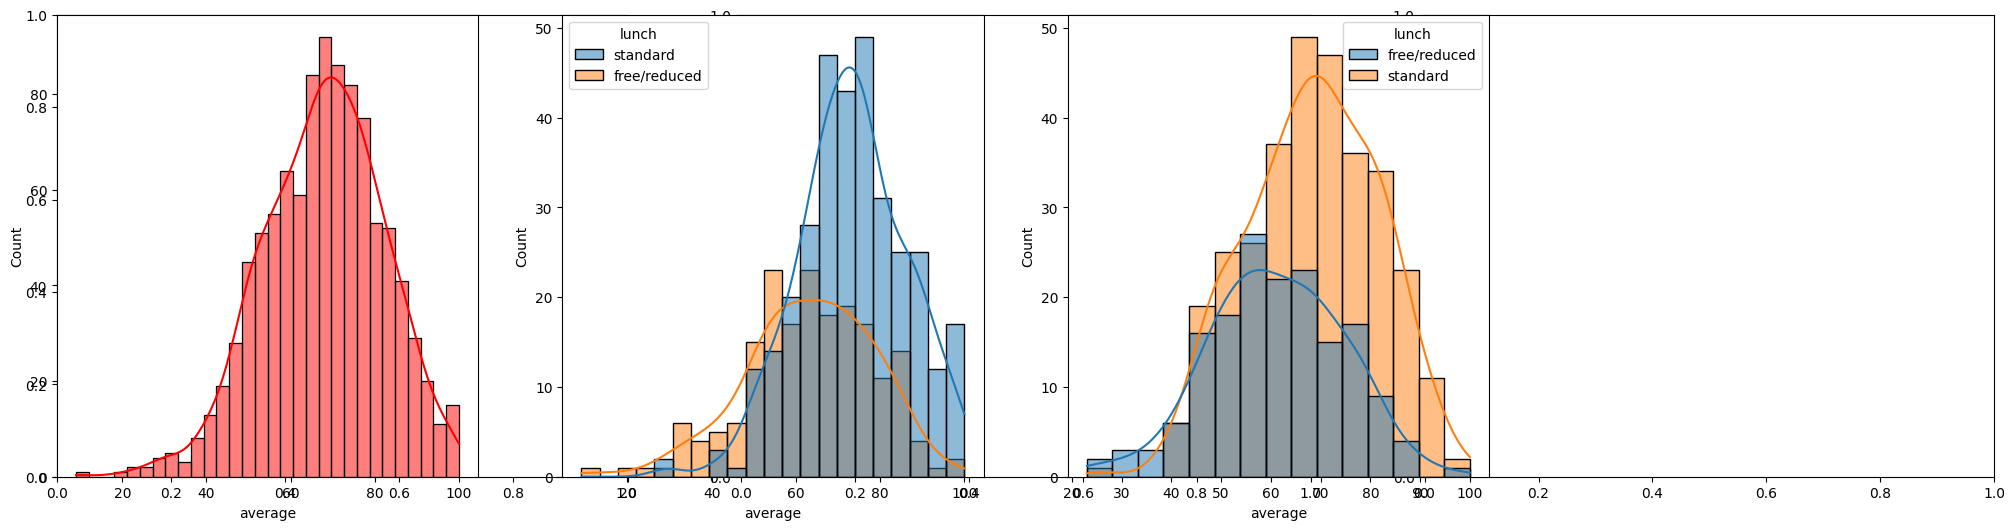

'\nstandard lunch helps perform well in exams than free/reduced lunch.\nstandard lunch helps perform well in exams for both male and female .\n'

In [17]:
fig,axs=plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',bins=30,kde=True,color='r')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',hue='lunch',kde=True)
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',hue='lunch',kde=True)
plt.show()
'''
standard lunch helps perform well in exams than free/reduced lunch.
standard lunch helps perform well in exams for both male and female .
'''

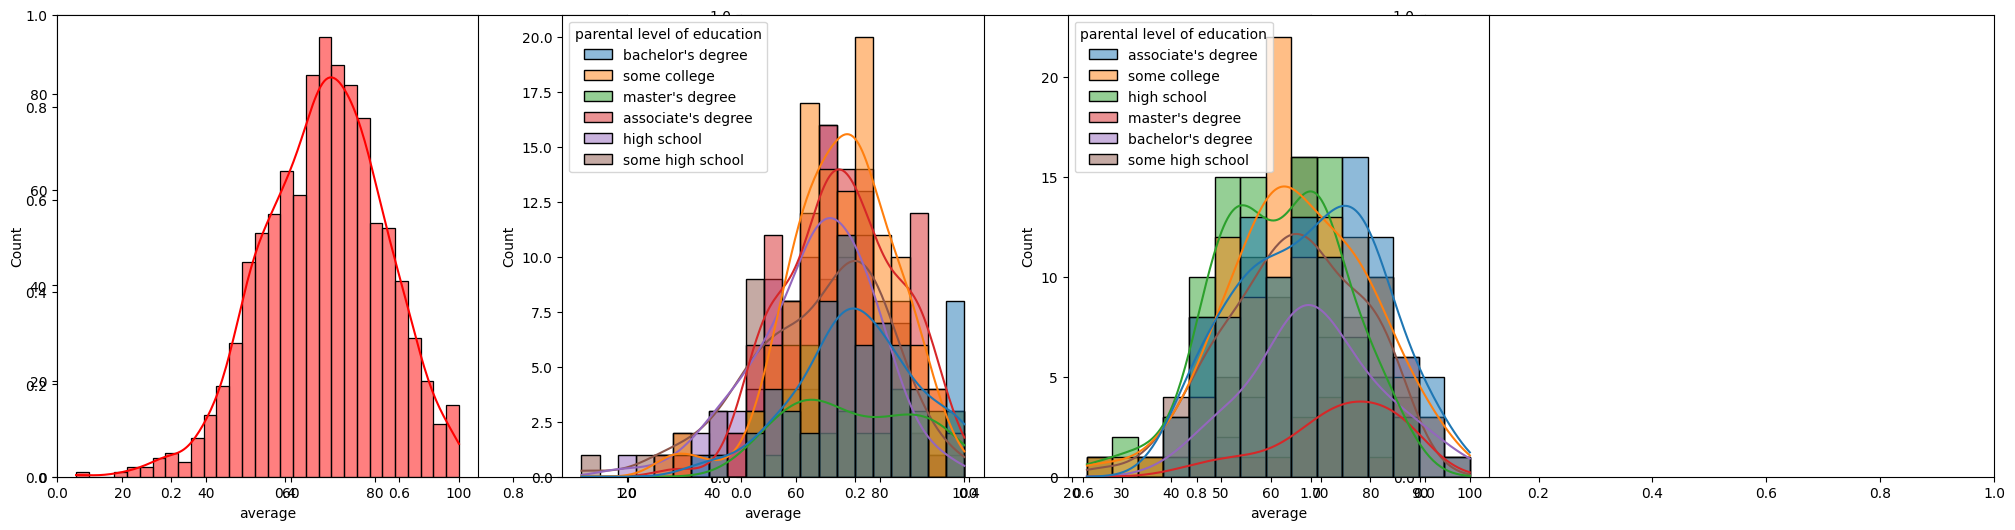

In [18]:
fig,axs=plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',bins=30,kde=True,color='r')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',hue='parental level of education',kde=True)
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',hue='parental level of education',kde=True)
plt.show()